In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular
from mlxtend.plotting import plot_decision_regions
import pandas as pd

In [13]:
X,y=make_moons(n_samples=1000,noise=0.2,random_state=42)

In [14]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
explainer=lime_tabular.LimeTabularExplainer(training_data=X,feature_names=['Feature 1','Feature 2'],class_names=['Class 0','Class 1'],mode='classification',discretize_continuous=False)

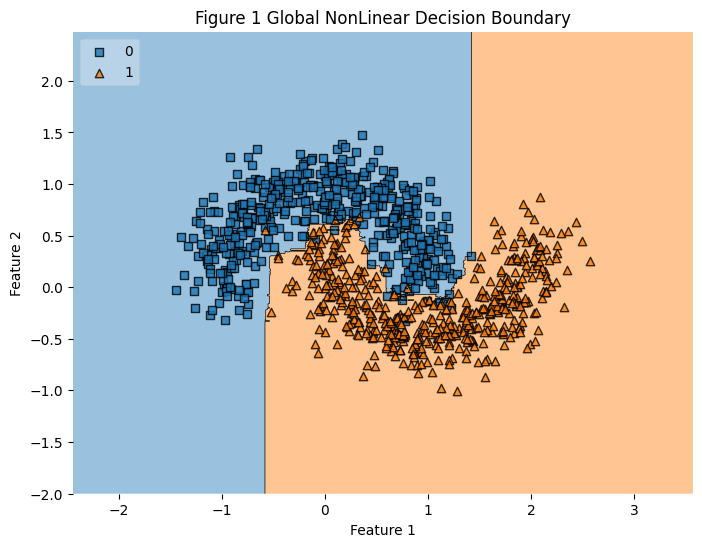

In [16]:
plt.figure(figsize=(8,6))
plot_decision_regions(X,y,clf=rf,legend=2)
plt.title("Figure 1 Global NonLinear Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [17]:
i=25
exp=explainer.explain_instance(X[i],rf.predict_proba,num_features=2)

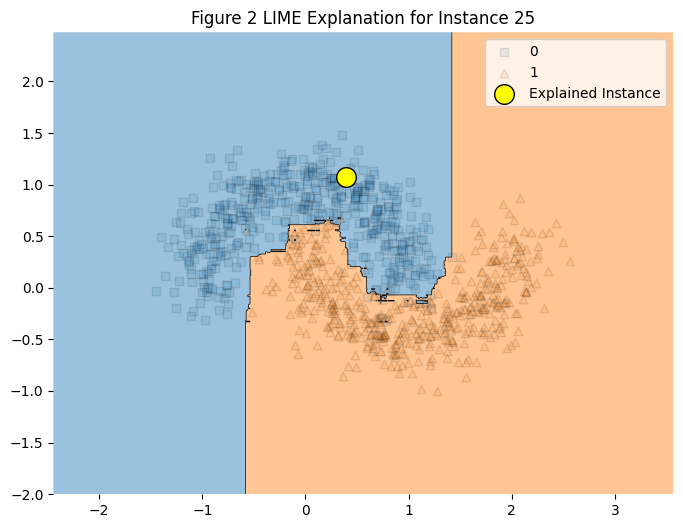

In [18]:
plt.figure(figsize=(8,6))
plot_decision_regions(X,y,clf=rf,legend=2,scatter_kwargs={'alpha':0.1})
plt.scatter(X[i,0],X[i,1],s=200,c='yellow',edgecolors='black',label='Explained Instance')
plt.title(f"Figure 2 LIME Explanation for Instance {i}")
plt.legend()
plt.show()

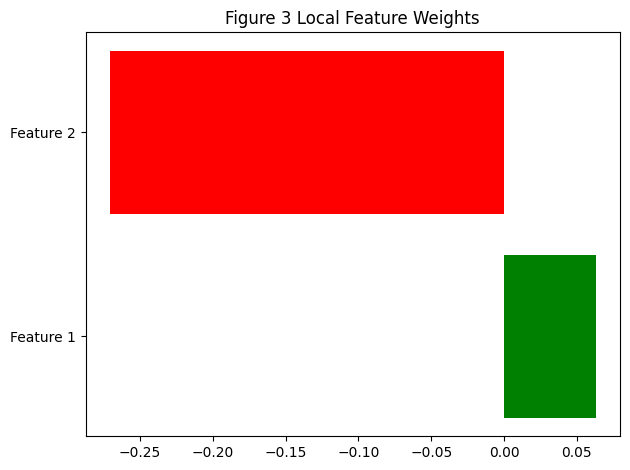

In [19]:
exp.as_pyplot_figure()
plt.title("Figure 3 Local Feature Weights")
plt.tight_layout()
plt.show()

In [20]:
print("Weights:",exp.as_list())

Weights: [('Feature 2', -0.2706404889463961), ('Feature 1', 0.06292473196465173)]


## Part 2: Stability and Robustness Analysis

Running Stability Analysis
Stability Statistics:
Feature 2    0.006770
Feature 1    0.007452
dtype: float64


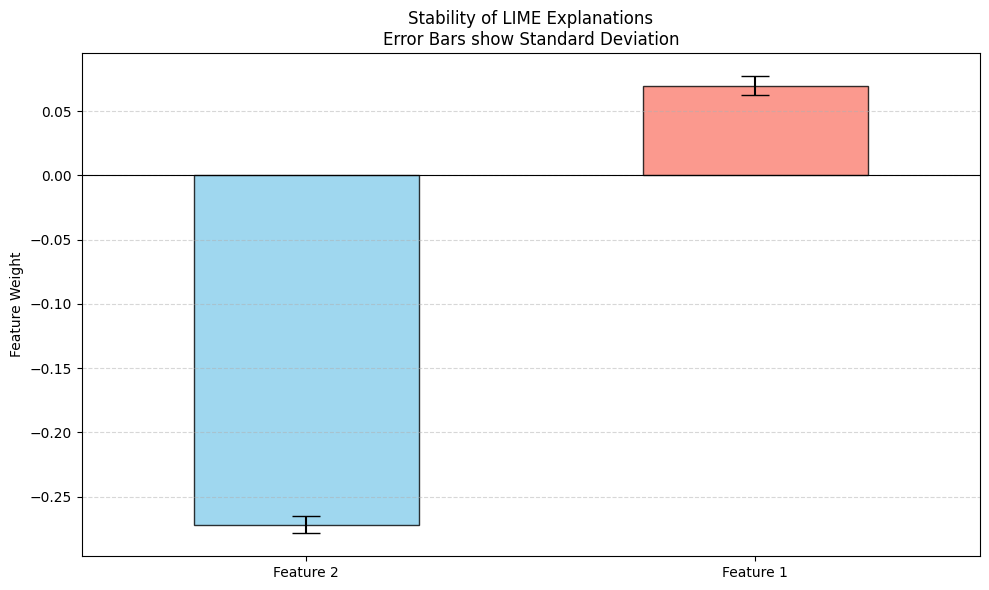

In [ ]:
instance = X[i]
print("Running Stability Analysis")
weights_log = []
explainer_stable = lime_tabular.LimeTabularExplainer(
    training_data=X,
    feature_names=['Feature 1', 'Feature 2'],
    class_names=['Class 0', 'Class 1'],
    mode='classification',
    discretize_continuous=False
)
for run in range(10):
    exp = explainer_stable.explain_instance(instance, rf.predict_proba, num_features=2)
    w_map = dict(exp.as_list())
    weights_log.append(w_map)
df_stability = pd.DataFrame(weights_log)
means = df_stability.mean()
stds = df_stability.std()
print("Stability Statistics:")
print(stds)
plt.figure(figsize=(10, 6))
means.plot(kind='bar', yerr=stds, capsize=10,
           color=['skyblue', 'salmon'], edgecolor='black', alpha=0.8, rot=0)
plt.title(f'Stability of LIME Explanations\nError Bars show Standard Deviation')
plt.ylabel('Feature Weight')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Running Kernel Width Analysis


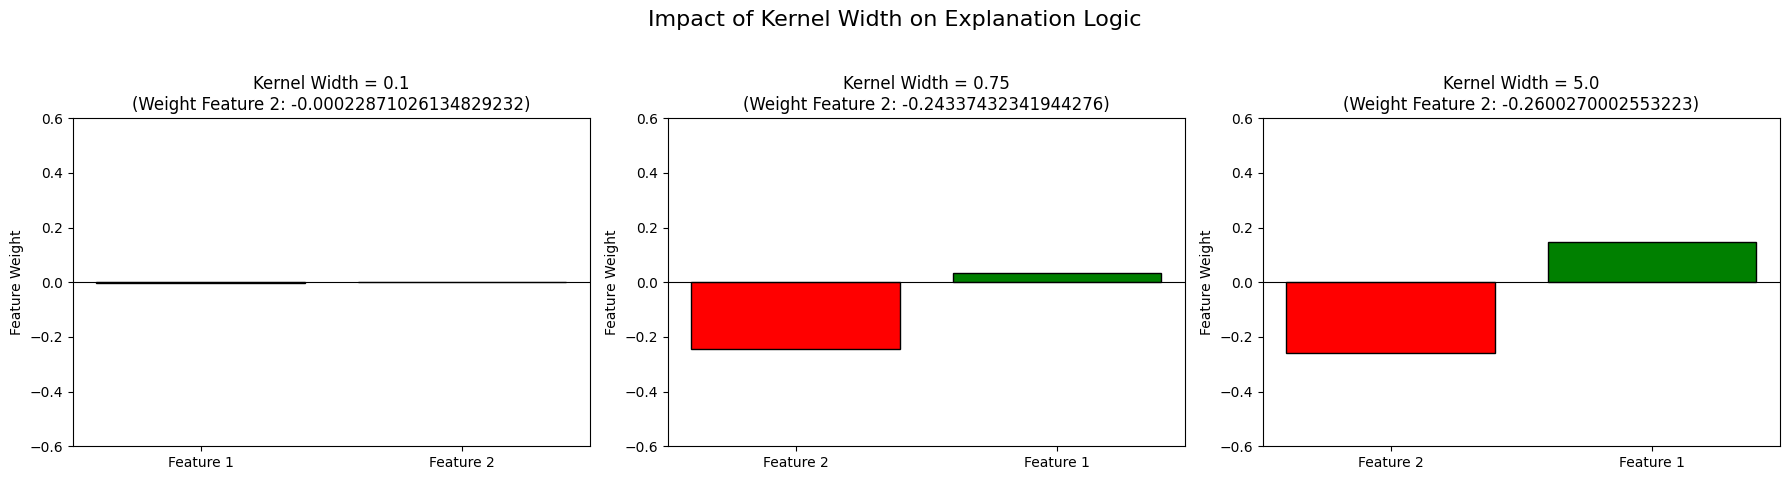

In [22]:
#KERNEL WIDTH ANALYSIS
print("Running Kernel Width Analysis")
kernel_widths = [0.1, 0.75, 5.0]
results_width = {}
plt.figure(figsize=(18, 5))
for idx, width in enumerate(kernel_widths):
    explainer_width = lime_tabular.LimeTabularExplainer(
        training_data=X,
        feature_names=['Feature 1', 'Feature 2'],
        class_names=['Class 0', 'Class 1'],
        mode='classification',
        discretize_continuous=False,
        kernel_width=width
    )
    exp = explainer_width.explain_instance(instance, rf.predict_proba, num_features=2)
    weights = dict(exp.as_list())
    results_width[width] = weights
    plt.subplot(1, 3, idx+1)
    features = list(weights.keys())
    vals = list(weights.values())
    colors = ['green' if x > 0 else 'red' for x in vals]
    plt.bar(features, vals, color=colors, edgecolor='black')
    plt.title(f'Kernel Width = {width}\n(Weight Feature 2: {weights["Feature 2"]})')
    plt.ylim(-0.6, 0.6)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.ylabel('Feature Weight')
plt.suptitle(f'Impact of Kernel Width on Explanation Logic', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()